## Data Preprocessing & Cleaning

In [1]:
import pandas as pd

#Load Data
df = pd.read_csv('buth_kade_transactions.csv')
print(f"Data loaded successfully. Shape: {df.shape}")
print(df.head())

Data loaded successfully. Shape: (5076, 3)
  Transaction_ID                                              Items  \
0          T0001      Red Rice, Coconut Sambol, Chicken, Pol Sambol   
1          T0002                 Fried Rice, Chilli Paste, Gotukola   
2          T0003  Red Rice, Chilli Paste, Dried Fish, Mallum, Fr...   
3          T0004              Red Rice, Chicken, Fried Egg, Pumpkin   
4          T0005          String Hoppers, Devilled Chicken, Chicken   

            Time_Stamp  
0  2025-11-16 11:00 AM  
1  2025-11-16 11:00 AM  
2  2025-11-16 11:00 AM  
3  2025-11-16 11:00 AM  
4  2025-11-16 11:00 AM  


In [2]:
# Analyze missing values (including empty strings)
print("Missing Values Analysis:")
print("=" * 30)

# Check for both NaN and empty strings
items_missing = df['Items'].isnull().sum() + (df['Items'] == '').sum()
timestamp_missing = df['Time_Stamp'].isnull().sum() + (df['Time_Stamp'] == '').sum()
transaction_missing = df['Transaction_ID'].isnull().sum()

print(f"Transaction_ID missing: {transaction_missing}")
print(f"Items missing (NaN + empty): {items_missing}")
print(f"Time_Stamp missing (NaN + empty): {timestamp_missing}")
print(f"\nTotal missing values: {items_missing + timestamp_missing + transaction_missing}")

# Store counts before handling missing values
items_missing_before = items_missing
timestamp_missing_before = timestamp_missing



Missing Values Analysis:
Transaction_ID missing: 0
Items missing (NaN + empty): 50
Time_Stamp missing (NaN + empty): 26

Total missing values: 76


In [3]:
# Analyze missing values
print("Missing Values Analysis:")
print("=" * 30)
print(f"Transaction_ID missing: {df['Transaction_ID'].isnull().sum()}")
print(f"Items missing: {df['Items'].isnull().sum()}")
print(f"Time_Stamp missing: {df['Time_Stamp'].isnull().sum()}")
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Store counts before handling missing values
items_missing_before = df['Items'].isnull().sum()
timestamp_missing_before = df['Time_Stamp'].isnull().sum()



Missing Values Analysis:
Transaction_ID missing: 0
Items missing: 50
Time_Stamp missing: 26

Total missing values: 76


In [4]:
# Handle Missing Values
print("Handling Missing Values:")
print("=" * 30)

# Step 1: Drop rows with missing Items
print(f"Before: {df.shape[0]} rows")
df_cleaned = df.dropna(subset=['Items'])
print(f"Dropped {df.shape[0] - df_cleaned.shape[0]} rows with missing Items")

# Step 2: Forward fill missing timestamps
print(f"Missing timestamps before: {df_cleaned['Time_Stamp'].isnull().sum()}")
df_cleaned['Time_Stamp'] = df_cleaned['Time_Stamp'].fillna(method='ffill')
print(f"Missing timestamps after: {df_cleaned['Time_Stamp'].isnull().sum()}")

print(f"\nFinal shape: {df_cleaned.shape}")


Handling Missing Values:
Before: 5076 rows
Dropped 50 rows with missing Items
Missing timestamps before: 26
Missing timestamps after: 0

Final shape: (5026, 3)


C:\Users\Anujan\AppData\Local\Temp\ipykernel_32192\1064595745.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned['Time_Stamp'] = df_cleaned['Time_Stamp'].fillna(method='ffill')
C:\Users\Anujan\AppData\Local\Temp\ipykernel_32192\1064595745.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time_Stamp'] = df_cleaned['Time_Stamp'].fillna(method='ffill')


In [5]:
# Data Standardization
# Step 1: Convert Items column from strings to lists
df_cleaned['Items_List'] = df_cleaned['Items'].str.split(', ')

# Step 2: Create a mapping for synonyms and typos
item_mapping = {
    'Fried Fish': 'Fish',
    'Fish Ambul Thiyal': 'Fish', 
    'Dried Fish': 'Fish',
    'Chicken Curry': 'Chicken',
    'pol_sambol': 'Pol Sambol',
    'Coconut Sambol': 'Pol Sambol'
}

# Step 3: Apply standardization to each transaction
def standardize_items(item_list):
    """Standardize items by applying mapping for synonyms and typos"""
    if item_list is None:
        return []
    
    standardized = []
    for item in item_list:
        item = item.strip()
        standardized_item = item_mapping.get(item, item)
        standardized.append(standardized_item)
    
    return standardized

# Apply standardization
df_cleaned['Items_Standardized'] = df_cleaned['Items_List'].apply(standardize_items)

print("\nAfter standardization:")
for i in range(3):
    print(f"  {df_cleaned.iloc[i]['Items_Standardized']}")


After standardization:
  ['Red Rice', 'Pol Sambol', 'Chicken', 'Pol Sambol']
  ['Fried Rice', 'Chilli Paste', 'Gotukola']
  ['Red Rice', 'Chilli Paste', 'Fish', 'Mallum', 'Fried Egg']


C:\Users\Anujan\AppData\Local\Temp\ipykernel_32192\1266847175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Items_List'] = df_cleaned['Items'].str.split(', ')
C:\Users\Anujan\AppData\Local\Temp\ipykernel_32192\1266847175.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Items_Standardized'] = df_cleaned['Items_List'].apply(standardize_items)


In [8]:
# Transformation: One-Hot Encoding using TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder

print("\nTransformation to One-Hot Encoded Matrix:")
print("=" * 50)

# Initialize TransactionEncoder
te = TransactionEncoder()

# Fit and transform the standardized items lists
te_array = te.fit(df_cleaned['Items_Standardized']).transform(df_cleaned['Items_Standardized'])

# Create DataFrame with one-hot encoded values
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

print(f"One-Hot Encoded Matrix Shape: {df_encoded.shape}")
print(f"Number of unique items: {len(te.columns_)}")
print(f"\nUnique items found:")
print(sorted(te.columns_))
print(f"\nFirst 5 rows of encoded data:")
print(df_encoded.head())


Transformation to One-Hot Encoded Matrix:
One-Hot Encoded Matrix Shape: (5026, 20)
Number of unique items: 20

Unique items found:
['Brinjal Moju', 'Chicken', 'Chilli Paste', 'Chop Suey', 'Devilled Chicken', 'Dhal', 'Fish', 'Fried Egg', 'Fried Rice', 'Gotukola', 'Jackfruit', 'Kiri Hodi', 'Mallum', 'Papadam', 'Pol Sambol', 'Potato Tempered', 'Pumpkin', 'Red Rice', 'String Hoppers', 'White Rice']

First 5 rows of encoded data:
   Brinjal Moju  Chicken  Chilli Paste  Chop Suey  Devilled Chicken   Dhal  \
0         False     True         False      False             False  False   
1         False    False          True      False             False  False   
2         False    False          True      False             False  False   
3         False     True         False      False             False  False   
4         False     True         False      False              True  False   

    Fish  Fried Egg  Fried Rice  Gotukola  Jackfruit  Kiri Hodi  Mallum  \
0  False      False       

## Feature Engineering

In [9]:
# Feature Engineering: Base Starch Classification
# Define base starch categories
rice_based = ['Red Rice', 'White Rice', 'Fried Rice']
noodle_based = ['String Hoppers']

# Classify transactions
def classify_base_starch(items_list):
    if any(item in rice_based for item in items_list):
        return 'Rice-Based'
    elif any(item in noodle_based for item in items_list):
        return 'Noodle-Based'
    return 'Other'

df_cleaned['Base_Starch'] = df_cleaned['Items_Standardized'].apply(classify_base_starch)

print(f"\nBase Starch Distribution:")
print(df_cleaned['Base_Starch'].value_counts())
print(f"\nSample transactions:")
print(df_cleaned[['Items_Standardized', 'Base_Starch']].head(10))



Base Starch Distribution:
Base_Starch
Rice-Based      3752
Noodle-Based    1274
Name: count, dtype: int64

Sample transactions:
                                  Items_Standardized   Base_Starch
0        [Red Rice, Pol Sambol, Chicken, Pol Sambol]    Rice-Based
1               [Fried Rice, Chilli Paste, Gotukola]    Rice-Based
2  [Red Rice, Chilli Paste, Fish, Mallum, Fried Egg]    Rice-Based
3            [Red Rice, Chicken, Fried Egg, Pumpkin]    Rice-Based
4        [String Hoppers, Devilled Chicken, Chicken]  Noodle-Based
5  [String Hoppers, Fried Egg, Potato Tempered, D...  Noodle-Based
6  [String Hoppers, Gotukola, Brinjal Moju, Kiri ...  Noodle-Based
7                [Fried Rice, Fish, Jackfruit, Fish]    Rice-Based
8          [White Rice, Chicken, Fried Egg, Chicken]    Rice-Based
9               [String Hoppers, Dhal, Brinjal Moju]  Noodle-Based


C:\Users\Anujan\AppData\Local\Temp\ipykernel_32192\200132180.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Base_Starch'] = df_cleaned['Items_Standardized'].apply(classify_base_starch)


In [11]:
# Feature Engineering: Time-Binning
import pandas as pd

# Convert Time_Stamp to datetime
df_cleaned['Time_Stamp'] = pd.to_datetime(df_cleaned['Time_Stamp'], format='%Y-%m-%d %I:%M %p')

# Extract hour from timestamp
df_cleaned['Hour'] = df_cleaned['Time_Stamp'].dt.hour

# Create time bins
def classify_time_bin(hour):
    if hour < 12:
        return 'Early Lunch'
    elif 12 <= hour < 13:
        return 'Peak Lunch'
    else:
        return 'Late Lunch'

df_cleaned['Time_Bin'] = df_cleaned['Hour'].apply(classify_time_bin)

print("Time Binning Distribution:")
print("=" * 30)
print(df_cleaned['Time_Bin'].value_counts().sort_index())
print(f"\nSample transactions with time bins:")
print(df_cleaned[['Transaction_ID', 'Time_Stamp', 'Hour', 'Time_Bin']].head(10))

Time Binning Distribution:
Time_Bin
Early Lunch    1382
Late Lunch     2157
Peak Lunch     1487
Name: count, dtype: int64

Sample transactions with time bins:
  Transaction_ID          Time_Stamp  Hour     Time_Bin
0          T0001 2025-11-16 11:00:00    11  Early Lunch
1          T0002 2025-11-16 11:00:00    11  Early Lunch
2          T0003 2025-11-16 11:00:00    11  Early Lunch
3          T0004 2025-11-16 11:00:00    11  Early Lunch
4          T0005 2025-11-16 11:00:00    11  Early Lunch
5          T0006 2025-11-16 11:00:00    11  Early Lunch
6          T0007 2025-11-16 11:01:00    11  Early Lunch
7          T0008 2025-11-16 11:01:00    11  Early Lunch
8          T0009 2025-11-16 11:01:00    11  Early Lunch
9          T0010 2025-11-16 11:02:00    11  Early Lunch


C:\Users\Anujan\AppData\Local\Temp\ipykernel_32192\37794407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time_Stamp'] = pd.to_datetime(df_cleaned['Time_Stamp'], format='%Y-%m-%d %I:%M %p')
C:\Users\Anujan\AppData\Local\Temp\ipykernel_32192\37794407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Hour'] = df_cleaned['Time_Stamp'].dt.hour
C:\Users\Anujan\AppData\Local\Temp\ipykernel_32192\37794407.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [12]:
# Feature Engineering: Vegetarian Classification
non_vegetarian_items = ['Chicken', 'Devilled Chicken', 'Fish', 'Fried Egg']

def is_vegetarian(items_list):
    """Check if transaction contains only vegetarian items"""
    return not any(item in non_vegetarian_items for item in items_list)

df_cleaned['Is_Vegetarian'] = df_cleaned['Items_Standardized'].apply(is_vegetarian)

print("Vegetarian Classification:")
print("=" * 30)
print(df_cleaned['Is_Vegetarian'].value_counts())
print(f"\nSample vegetarian transactions:")
print(df_cleaned[df_cleaned['Is_Vegetarian'] == True][['Items_Standardized', 'Is_Vegetarian']].head())
print(f"\nSample non-vegetarian transactions:")
print(df_cleaned[df_cleaned['Is_Vegetarian'] == False][['Items_Standardized', 'Is_Vegetarian']].head())

Vegetarian Classification:
Is_Vegetarian
False    4082
True      944
Name: count, dtype: int64

Sample vegetarian transactions:
                                   Items_Standardized  Is_Vegetarian
1                [Fried Rice, Chilli Paste, Gotukola]           True
9                [String Hoppers, Dhal, Brinjal Moju]           True
19                 [Fried Rice, Brinjal Moju, Mallum]           True
22  [Fried Rice, Potato Tempered, Brinjal Moju, Pu...           True
36        [White Rice, Dhal, Kiri Hodi, Chilli Paste]           True

Sample non-vegetarian transactions:
                                  Items_Standardized  Is_Vegetarian
0        [Red Rice, Pol Sambol, Chicken, Pol Sambol]          False
2  [Red Rice, Chilli Paste, Fish, Mallum, Fried Egg]          False
3            [Red Rice, Chicken, Fried Egg, Pumpkin]          False
4        [String Hoppers, Devilled Chicken, Chicken]          False
5  [String Hoppers, Fried Egg, Potato Tempered, D...          False


C:\Users\Anujan\AppData\Local\Temp\ipykernel_32192\2793117236.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Is_Vegetarian'] = df_cleaned['Items_Standardized'].apply(is_vegetarian)


## Customer Segmentation (Ensemble )

In [13]:
from sklearn.cluster import KMeans

# Apply K-Means Clustering
print("K-Means Clustering:")
print("=" * 50)

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit and predict clusters on the one-hot encoded data
df_cleaned['Cluster'] = kmeans.fit_predict(df_encoded)

print(f"Clustering completed successfully")
print(f"\nCluster Distribution:")
print(df_cleaned['Cluster'].value_counts().sort_index())

print(f"\nCluster Centers Shape: {kmeans.cluster_centers_.shape}")
print(f"\nSample transactions with cluster labels:")
print(df_cleaned[['Transaction_ID', 'Items_Standardized', 'Cluster']].head(10))

# Display cluster statistics
print(f"\nCluster Statistics:")
for cluster_id in range(3):
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}:")
    print(f"  Size: {len(cluster_data)} transactions")
    print(f"  Percentage: {len(cluster_data)/len(df_cleaned)*100:.2f}%")

K-Means Clustering:
Clustering completed successfully

Cluster Distribution:
Cluster
0    1274
1    2474
2    1278
Name: count, dtype: int64

Cluster Centers Shape: (3, 20)

Sample transactions with cluster labels:
  Transaction_ID                                 Items_Standardized  Cluster
0          T0001        [Red Rice, Pol Sambol, Chicken, Pol Sambol]        1
1          T0002               [Fried Rice, Chilli Paste, Gotukola]        2
2          T0003  [Red Rice, Chilli Paste, Fish, Mallum, Fried Egg]        1
3          T0004            [Red Rice, Chicken, Fried Egg, Pumpkin]        1
4          T0005        [String Hoppers, Devilled Chicken, Chicken]        0
5          T0006  [String Hoppers, Fried Egg, Potato Tempered, D...        0
6          T0007  [String Hoppers, Gotukola, Brinjal Moju, Kiri ...        0
7          T0008                [Fried Rice, Fish, Jackfruit, Fish]        2
8          T0009          [White Rice, Chicken, Fried Egg, Chicken]        1
9          T001

C:\Users\Anujan\AppData\Local\Temp\ipykernel_32192\2768955263.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(df_encoded)


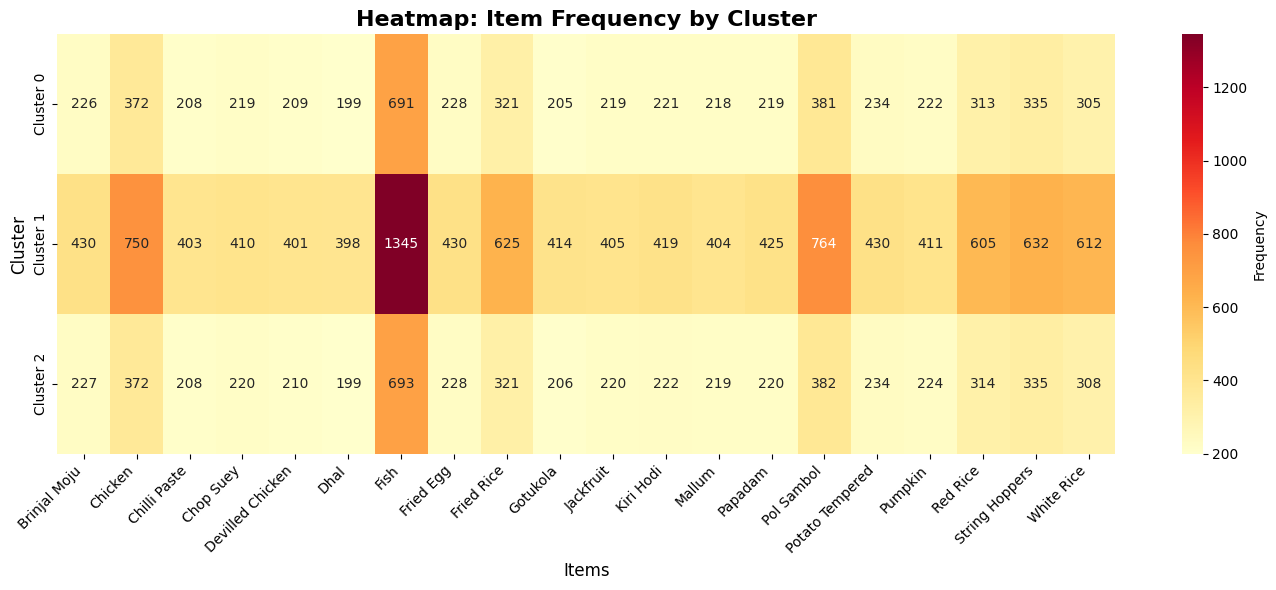

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create heatmap showing frequency of items in each cluster
plt.figure(figsize=(14, 6))

# Use the cluster_item_freq_t dataframe that was already created
sns.heatmap(cluster_item_freq_t, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Frequency'})

plt.title('Heatmap: Item Frequency by Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Items', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Cluster 0: String Hopper Enthusiasts (Noodle-Based Lovers)
- **Size**: 1274 transactions (~25%)
- **Top 5 Items**:
  1. Fish: 691 times
  2. Pol Sambol: 381 times
  3. Chicken: 372 times
  4. String Hoppers: 335 times
  5. Fried Rice: 321 times
- **Dominant Base Starch**: Noodle-Based (1274 transactions)
- **Vegetarian Transactions**: 225 
- **Most Active Time**: Late Lunch 
- **Protein Preferences**:
  - Fish: 691 times
  - Chicken: 372 times
  - Fried Egg: 228 times
  - Devilled Chicken: 209 times

#### Cluster 1: Rice Lovers (Balanced Meat Eaters)
- **Size**: 2474 transactions (~50~%)
- **Top 5 Items**:
  1. Fish: 1345 times
  2. Pol Sambol: 764 times
...
#### Vegetarian Behavior:
- all clusters have ~ 20% vegetarian transactions


## Segmented Apriori Training 

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Dictionary to store results for each cluster
apriori_results = {}
association_rules_results = {}

print("Running Apriori Algorithm for Each Cluster:")
print("=" * 70)

# Loop through each cluster
for cluster_id in sorted(df_cleaned['Cluster'].unique()):
    print(f"\n{'='*70}")
    print(f"Processing Cluster {cluster_id}: {cluster_labels[cluster_id]}")
    print(f"{'='*70}")
    
    # Get transactions for this cluster
    cluster_mask = df_cleaned['Cluster'] == cluster_id
    cluster_transactions = df_encoded[cluster_mask.values]
    
    print(f"Number of transactions: {len(cluster_transactions)}")
    
    # Apply Apriori algorithm with min_support=0.05 (5%)
    frequent_itemsets = apriori(cluster_transactions, min_support=0.05, use_colnames=True)
    
    print(f"Number of frequent itemsets found: {len(frequent_itemsets)}")
    
    # Store results
    apriori_results[cluster_id] = frequent_itemsets
    
    # Generate association rules if frequent itemsets exist
    if len(frequent_itemsets) > 0:
        # Generate rules with minimum confidence of 0.5 (50%)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
        association_rules_results[cluster_id] = rules
        
        print(f"Number of association rules generated: {len(rules)}")
        
        if len(rules) > 0:
            # Display top 5 rules by lift
            print(f"\nTop 5 Association Rules (by Lift):")
            top_rules = rules.nlargest(5, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
            for idx, rule in top_rules.iterrows():
                print(f"  {set(rule['antecedents'])} -> {set(rule['consequents'])}")
                print(f"    Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")
    else:
        association_rules_results[cluster_id] = None
        print("No association rules generated (insufficient frequent itemsets)")

print(f"\n{'='*70}")
print("Apriori Algorithm Completed for All Clusters")
print(f"{'='*70}")

Running Apriori Algorithm for Each Cluster:

Processing Cluster 0: String Hopper Enthusiasts (Noodle-Based Lovers)
Number of transactions: 1274
Number of frequent itemsets found: 69
Number of association rules generated: 56

Top 5 Association Rules (by Lift):
  {'Brinjal Moju'} -> {'String Hoppers'}
    Support: 0.165, Confidence: 1.000, Lift: 1.000
  {'Chicken'} -> {'String Hoppers'}
    Support: 0.294, Confidence: 1.000, Lift: 1.000
  {'Chilli Paste'} -> {'String Hoppers'}
    Support: 0.152, Confidence: 1.000, Lift: 1.000
  {'Chop Suey'} -> {'String Hoppers'}
    Support: 0.168, Confidence: 1.000, Lift: 1.000
  {'Devilled Chicken'} -> {'String Hoppers'}
    Support: 0.161, Confidence: 1.000, Lift: 1.000

Processing Cluster 1: Rice Lovers (Balanced Meat Eaters)
Number of transactions: 2474
Number of frequent itemsets found: 71
Number of association rules generated: 28

Top 5 Association Rules (by Lift):
  {'Potato Tempered'} -> {'Red Rice'}
    Support: 0.095, Confidence: 0.553, Lift

c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
